<a href="https://colab.research.google.com/github/tohnperfect/DPDM/blob/master/Pandas_and_Data_Preprocessing_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

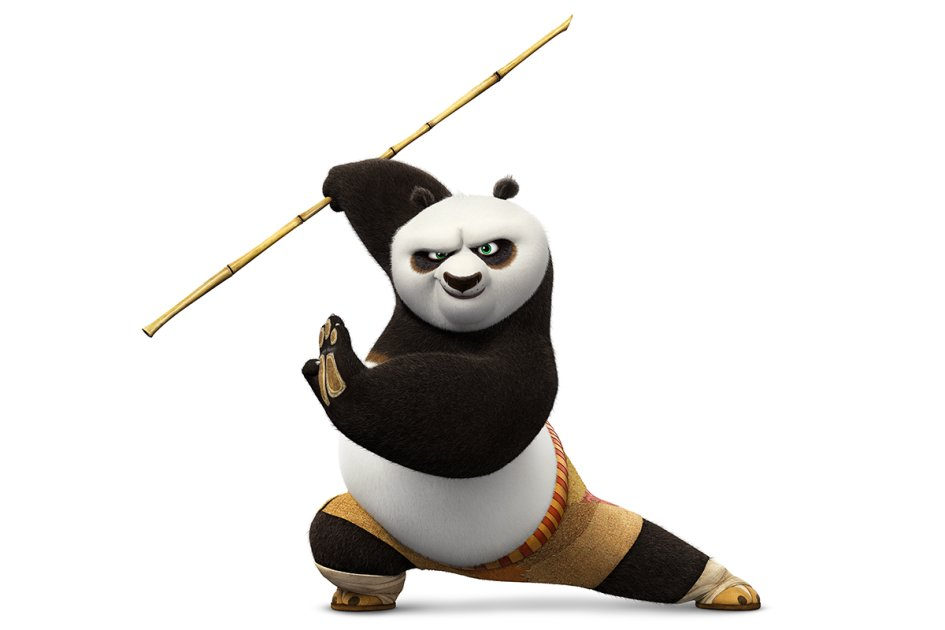

## First, we have to say which packages we are going to use by <font color=green>import</font> them. 

In [1]:
import pandas

## Connect with Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'


Mounted at /content/drive


## Create _path_ variables to store where is the data files 

In [3]:
import os

In [4]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

## Then use _pandas_ to load the data into the environment

In [5]:
search_click_df = pandas.read_csv(search_click)

In [6]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [7]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


## To check if the dimension of loaded data is correct as described in the description

In [8]:
search_click_df.shape

(1048575, 6)

In [9]:
w_restaurant_df.shape

(246847, 32)

In [10]:
search_click_df.shape[0]

1048575

## It seem everything is ok, let's have fun with data

## 0. Point to data in the table

### normal indexing

In [11]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [12]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [13]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


### .iloc

In [14]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [15]:
search_click_df.iloc[:10,:2]

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


## 1 Missing Values

In [16]:
search_click_df.isnull()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [17]:
search_click_df.isnull().any()

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [18]:
search_click_df.isnull().any().any()

True

## Handling missing values 1

In [19]:
search_click_df_nm = search_click_df.dropna()

In [20]:
search_click_df_nm.isnull().any().any()

False

In [21]:
print(search_click_df.shape)
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


In [22]:
search_click_df.shape[0]-search_click_df_nm.shape[0]

369

## Excercise 1 ตรวจสอบว่า การลบข้อมูล missing ออก

## จากตาราง w_restarant จะทำให้ข้อมูลลดลงกี่ %

In [23]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} \nsize after drop = {size_after_drop} \
    \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 
size after drop = 4     
which is 99.99837956304918


## Method 1.5

In [24]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [25]:
w_rest_dropped_avgprice = w_restaurant_df.dropna(subset=['id','name','avg_price'])
w_rest_dropped_avgprice.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
11,27,แพอาหารธาราบุรี,1,0,Kanchanaburi,71000,w4qzbb4,0,3.568245,NaN,107.0,34,3,22277,26,0,0,Thai,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
67,123,เล็กกุ้งเผา,1,0,Bangkok Metropolitan Region,10310,w4rw9mc,0,3.685552,NaN,272.0,29,7,28697,26,0,15,Thai,3.0,375.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,175,ใต้ต้นมะม่วง,1,0,Phuket,83000,w1muz5d,0,3.857143,NaN,17.0,15,2,3278,6,0,3,Thai,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
129,262,Oniku Shabushabu & Yakiniku,1,0,Surat Thani,84000,w1weuxg,0,3.633588,NaN,40.0,19,2,10349,7,0,11,Sukiyaki/Shabu,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,NaN,0.0,NaN,1.0
134,271,Cafe Cha,1,0,Bangkok Metropolitan Region,10300,w4rqrhf,0,4.094527,NaN,251.0,12,0,17775,11,0,7,Café/Coffee Shop,4.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [26]:
w_restaurant_df.dropna(subset=['id','name','avg_price'])['avg_price'].mean()

327.44728783902013

## Method 2 (raplace with reasonable value)

### we are replacing missing value in the number of chains with 0

In [27]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [28]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

## Method 2.1 (raplace with unknown value)
## Method 2.2 (raplace with mean)

## Method 3 

In [29]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


### [PD] select data

In [30]:
selected_list = new_table['city_name']=='Bangkok Metropolitan Region'
selected_list

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [31]:
new_table[selected_list].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [32]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


## หาราคาเฉลี่ยของร้านในจังหวัดกรุงเทพ

In [33]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1. เลือกเฉพาะ กทม

In [34]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


2. ลบ missing

In [35]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


3 เลือกเฉพาะ column 'avg_price'

In [36]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

4 หาค่าเฉลี่ย


In [37]:
bkk_table_dp_avg_price.mean()

392.5854715094968

## แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [38]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [39]:
#bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
#bkk_table.head()

## Ex 9 หาราคาเฉลี่ยของร้านในจังหวัดภูเก็ตและเติมแทนค่า missing ของจังหวัดภูเก็ต

In [40]:
pk_table = new_table[new_table['city_name']=='Phuket']
pk_table[['avg_price']] = pk_table[['avg_price']].fillna(new_table[new_table['city_name']=='Phuket'].dropna()['avg_price'].mean())
pk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,181.481481
74,ร้านอาหารในยางปาร์ค,Phuket,181.481481
91,ใต้ต้นมะม่วง,Phuket,50.000000
96,อาหารเกาหลีชินจอง,Phuket,181.481481
190,ไชน่าอินน์,Phuket,181.481481


In [41]:
ch_table = new_table[new_table['city_name']=='Chon Buri']
ch_table[['avg_price']] = ch_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chon Buri'].dropna()['avg_price'].mean())
ch_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
5,บ้านมุมสบาย,Chon Buri,283.547619
15,The Rabbit หมูกระทะนานาชาติ,Chon Buri,283.547619
42,ก๋วยเตี๋ยวเป็ด ณ.พัทยา,Chon Buri,283.547619
45,ซันเซ็ทพาร์ครีสอร์ตแอนด์สปา,Chon Buri,283.547619
68,Oldies Bar & Bistro,Chon Buri,283.547619


## [PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat

In [42]:
pandas.concat([bkk_table,pk_table,ch_table]).isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

## Looping (concat)

### 1. ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางออกมา 

In [43]:
all_cities = set(new_table['city_name'])
print(len(all_cities))
#all_cities

479


### 2. จะคำนวณค่า mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่

### เมืองที่เป็น missing ทุกร้าน 

In [44]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013

## 3. สร้าง list ของตารางของทุกๆจังหวัด

In [45]:
all_cities_list = []
for each_city in sorted(list(all_cities)):
    temp_table = new_table[new_table['city_name']==each_city]
    temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
    all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [46]:
no_missing = pandas.concat(all_cities_list).fillna(all_mean)
no_missing.head()

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288


In [47]:
index_list = no_missing['avg_price']>1000
no_missing[index_list]

,name,city_name,avg_price
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
3022,J'AIME by Jean-Michel Lorain,Bangkok Metropolitan Region,1500.0
4798,Xin Tian Di,Bangkok Metropolitan Region,1500.0
5804,P10 Clinic ( Surgery Cosmetic ),Bangkok Metropolitan Region,1500.0
7186,THYME Eatery&Bar,Bangkok Metropolitan Region,1500.0
...,...,...,...
62474,Acqua,Phuket,1500.0
160729,Haven Love Cake By Love Andaman,Phuket,1500.0
221495,Panache (Angsana Villa Reaort Phuket),Phuket,1500.0
57063,Jahn restaurant @Conrad Koh samui,Surat Thani,1500.0


## Smooth data (binning)

### HW10 ทำ Binning smooth by mean ค่า 'avg_price' ในตาราง no_missing (bins = 50)

#### 1 sort data by avg_price 

In [48]:
sorted_no_missing = no_missing.sort_values('avg_price')
sorted_no_missing

,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,0.0
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,0.0
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,4.0
204196,โภชนากร หนองมน,Chon Buri,11.0
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,1500.0
22942,BMC CLINIC,Bangkok Metropolitan Region,1500.0
168720,Bo.lan,Bangkok Metropolitan Region,1500.0
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,1500.0


#### 2 binning

In [49]:
import math

In [50]:
each_bin = sorted_no_missing.shape[0]/50
print(math.ceil(each_bin))

4937


In [51]:
50*4937

246850

In [52]:
for i in range(50):
    this_mean = sorted_no_missing.iloc[i*math.ceil(each_bin):i*math.ceil(each_bin)+math.ceil(each_bin),:]['avg_price'].mean()
    sorted_no_missing.iloc[i*math.ceil(each_bin):i*math.ceil(each_bin)+math.ceil(each_bin),:]['avg_price']=this_mean
sorted_no_missing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,110.607177
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,110.607177
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,110.607177
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,110.607177
204196,โภชนากร หนองมน,Chon Buri,110.607177
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,476.661359
22942,BMC CLINIC,Bangkok Metropolitan Region,476.661359
168720,Bo.lan,Bangkok Metropolitan Region,476.661359
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359


In [53]:
sorted_no_missing.iloc[246845:246850,:]

,name,city_name,avg_price
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359
100459,Paichaoclinic ไป๋เฉ่าสหคลินิก,Bangkok Metropolitan Region,476.661359


## Remove Outlier (boxplot)

In [54]:
from matplotlib import pyplot as plt

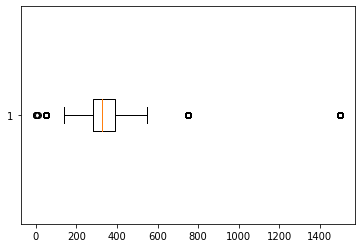

In [55]:
ret = plt.boxplot(no_missing['avg_price'],vert=False)

In [56]:
ret['boxes'][0].get_xdata()

array([283.54761905, 283.54761905, 392.58547151, 392.58547151,
       283.54761905])

In [57]:
print(ret['whiskers'][0].get_xdata())
print(ret['whiskers'][1].get_xdata())

[283.54761905 138.15789474]
[392.58547151 549.        ]


In [58]:
no_outlier_no_missing = no_missing[(no_missing['avg_price']>=ret['whiskers'][0].get_xdata()[1])]
no_outlier_no_missing = no_outlier_no_missing[(no_outlier_no_missing['avg_price']<=ret['whiskers'][1].get_xdata()[1])]

In [59]:
no_outlier_no_missing

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288
...,...,...,...
246412,ครัวข้าวสวย,เขาใหญ่,327.447288
246418,ร้านอาหารดาวเดือน,เขาใหญ่,327.447288
246780,กาแฟสด,เขาใหญ่,327.447288
246791,ยู้ ลูกชิ้นปลาเยาวราช,เขาใหญ่,327.447288


## Deduplication (remove duplication), sampling (randomly select data) vs PCA (reduce dimensions of data)

### Drop duplicate data

In [60]:
w_restaurant_df.shape

(246847, 32)

In [61]:
w_restaurant_df.drop_duplicates().shape

(246847, 32)

In [62]:
w_restaurant_df.drop_duplicates(subset=['name']).shape

(203707, 32)

### Ex 11 sample 1 restaurant from each city using drop_duplicates

In [63]:
w_restaurant_df.drop_duplicates(subset=['city_name'])

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.0,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.0,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,บ้านมุมสบาย,1,0,Chon Buri,NaN,w4rgsyz,0,5.0,0.0,2.0,0,0,930,0,0,0,Thai,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,1.0,0.0,0.0,0.0
6,15,Hing Fat Resteurant,1,0,New Territories,NaN,wecny4b,0,3.0,0.0,1.0,3,1,859,1,0,2,Noodles,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230650,321282,Tuong Cafe,1,0,tỉnh Kiên Giang,NaN,w3cfjsh,0,0.0,0.0,NaN,0,0,48,1,0,0,Vietnam,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239005,331078,Matahari,1,0,Nusa Tenggara Barat,NaN,qw6x8ub,0,3.0,0.0,NaN,1,0,120,1,0,0,International,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241165,333510,Seed cafe,1,0,Louisiana,10900,9vrkknk,0,0.0,0.0,NaN,0,0,99,0,0,0,Thai,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243902,336548,北門口肉圓,1,0,Changhua County,NaN,wsm9nbp,0,3.0,0.0,1.0,1,0,129,1,0,0,Fastfood,1.0,NaN,0.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN


### Sampling

In [64]:
w_restaurant_df.sample(n=10)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
167100,238612,คอฟฟี่บลายธ์,1,0,Bangkok Metropolitan Region,10220,w4rwf34,0,0.000000,0.0,NaN,0,0,108,0,0,0,Café/Coffee Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167674,239299,ศูนย์อาหารโลตัสพะเยา,1,0,Phayao,56000,w5rj1hu,0,3.000000,0.0,NaN,1,0,524,0,0,0,Noodles,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149064,215486,ขนมโตเกียว,1,0,Phra Nakhon Si Ayutthaya,NaN,w4x98ty,0,0.000000,0.0,NaN,0,0,61,1,0,0,Street Food/Food Stands,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78881,123326,ร้านนักเลงโรงเตี้ยม,1,0,Chai Nat,NaN,w4xnqnp,0,5.000000,0.0,2.0,1,1,2046,1,0,3,Bars,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
194826,273370,บะหมี่เกี๊ยวกุ้งแต้จิ๋ว,1,0,Bangkok Metropolitan Region,NaN,w4rqtz2,0,4.377778,0.0,18.0,3,0,1080,4,0,2,Noodles,1.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
106357,159875,จู โจว เป็ดพะโล้ร้อยปี,1,0,Bangkok Metropolitan Region,10230,w4rw9k4,0,4.014545,0.0,41.0,20,5,5613,12,0,16,Chinese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165810,236892,เอ็มวีเอ็นเตอร์เทนเมนท์,1,0,Kalasin,46000,w6ct7rx,0,0.000000,0.0,NaN,0,0,114,0,0,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76619,120108,ข้าวแกง ป้าแมว,1,0,Surat Thani,NaN,w1ycree,0,5.000000,0.0,5.0,1,0,366,0,0,0,Southern Food,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147602,213680,หมูปิ้งพ่อกับแม่,1,0,Bangkok Metropolitan Region,10400,w4rqrs7,0,5.000000,2.0,3.0,1,0,345,0,0,1,Fastfood,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
162853,233110,ละมุน,1,0,Phra Nakhon Si Ayutthaya,NaN,w4x98qx,0,3.000000,0.0,2.0,1,0,2832,0,0,0,Bars,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
w_restaurant_df.sample(frac=0.001)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
169437,241604,ริเวอร์ไซด์,1,0,Bangkok Metropolitan Region,12000,w4rx9f4,0,0.000000,0.0,NaN,0,0,491,0,0,0,Waterside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,65151,คลับซากุระมันไก,1,0,Bangkok Metropolitan Region,10110,w4rw0g9,0,0.000000,0.0,NaN,0,0,191,0,0,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121156,178939,ผลไม้ไทย(Fruit Thai),1,0,Bangkok Metropolitan Region,10400,w4rw2qq,0,3.000000,0.0,2.0,1,0,585,0,0,0,Street Food/Food Stands,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85716,132811,ล้านผัดไทท่าแพ,1,0,Chiang Mai,NaN,w5q6usx,0,3.878307,0.0,26.0,15,2,2413,9,0,1,Noodles,1.0,NaN,1.0,NaN,1.0,1.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0
88793,136999,ก๋วยเตี๋ยวอิสลาม,1,0,Krabi,81000,w1qppzc,0,0.000000,0.0,1.0,0,0,484,0,0,0,Muslim,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150377,217148,Chef Biker ก๊วยเตี๋ยวคั่วไก่,1,0,Bangkok Metropolitan Region,NaN,w4rt9dd,0,0.000000,0.0,2.0,0,0,1090,1,0,1,Noodles,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
163976,234505,ร้านตามสั่งปักใต้ สุขุมวิท 70,1,0,Bangkok Metropolitan Region,NaN,w4rtc3s,0,4.000000,0.0,NaN,1,0,156,0,0,0,Quick Meal,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
21370,33289,ก๋วยเตี๋ยวเป็ด,1,0,Ratchaburi,70150,w4qv6v1,0,3.032258,0.0,1.0,2,1,387,1,0,0,Noodles,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204590,285399,"Mitte Coffee, Cafe & Friends",1,0,Bangkok Metropolitan Region,11120,w4rrpgd,0,0.000000,0.0,1.0,0,0,668,0,0,1,Cafe,2.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


### Bootstrap sampling

In [66]:
w_restaurant_df.sample(n=10,replace=True)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
78035,122144,แคสมีร์,1,0,Phuket,83100,w1musub,0,0.00000,0.0,NaN,0,0,186,0,0,0,Thai,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238326,330345,ชาบู ทุกอย่าง 25 บาท,1,0,Chon Buri,NaN,w4ru64w,0,2.00000,0.0,1.0,1,0,544,0,0,2,Sukiyaki/Shabu,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
223745,308438,หอยทอดผัดไทยป้าอุบลตลาดน้ำอัมพวา,1,0,Samut Songkhram,75000,w4rh6s1,0,0.00000,0.0,NaN,0,0,1411,0,0,0,North East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207398,288765,ส้มตำหน้าปากซอย รร.ทรงวิทย์เทพารักษ์,1,0,Bangkok Metropolitan Region,NaN,w4rt6vf,0,3.00000,0.0,2.0,1,0,389,0,0,0,North East,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210716,292863,Mini Enclave,1,0,Kaohsiung City,NaN,wsj8ckc,0,5.00000,0.0,NaN,1,0,48,1,0,0,Bars,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50128,87134,ร้านลาบเป็ดผู้ใหญ่หนาโนนธาตุ,1,0,Nong Khai,43000,w71jd1h,0,4.00000,0.0,2.0,1,0,480,0,0,1,North East,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112050,167400,ครัวท๋อมนาท่าม,1,0,Krabi,81120,w1qs4e3,0,4.00000,0.0,1.0,1,0,1010,0,0,0,Thai,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221229,305440,Carrot On The Moon,1,0,Thailand,NaN,w5qn0h4,0,4.00000,0.0,4.0,1,0,763,0,0,0,Café/Coffee Shop,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
184416,260470,ตำ ยำ จุ่ม เผา,1,0,Bangkok Metropolitan Region,10120,w4rqp86,0,3.31746,0.0,4.0,3,2,2157,2,0,0,Seafood,2.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
130744,191457,แบล็กแค็ท,1,0,Phuket,83110,w1mvhrp,0,0.00000,0.0,NaN,0,0,93,0,0,0,Thai,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### PCA

In [67]:
from sklearn import datasets

In [68]:
iris_data = datasets.load_iris()

In [69]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [70]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

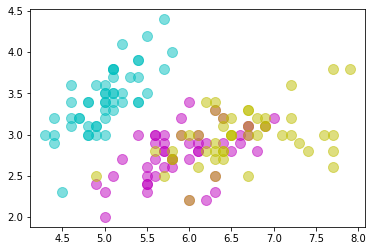

In [74]:
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,0],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,0],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

### HW 12 plot scatter 2d ของ iris data โดย ทดลองทุก 
### combination เช่น dimension1 x dimension 2, dimension 1 x dimension 3 ..., 
 ### แล้วดูว่า combination ไหนดีที่สุด

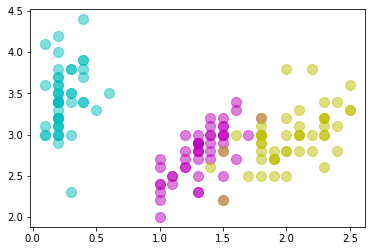

In [73]:
plt.scatter(iris_data['data'][:50,3],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,3],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,3],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

### PCA (Principal Component Analysis)

In [75]:
from sklearn.decomposition import PCA

In [76]:
model_pca = PCA(n_components=2)

In [79]:
iris_data['data'].shape

(150, 4)

In [78]:
X_reduced = model_pca.fit_transform(iris_data['data'])

In [80]:
X_reduced.shape

(150, 2)

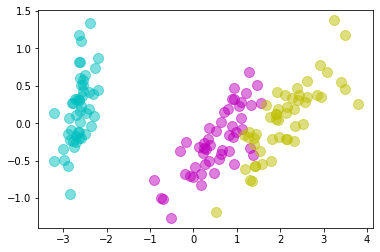

In [81]:
plt.scatter(X_reduced[:50,0],X_reduced[:50,1],s=100,c='c',alpha=0.5)
plt.scatter(X_reduced[50:100,0],X_reduced[50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(X_reduced[100:150,0],X_reduced[100:150,1],s=100,c='y',alpha=0.5)





## Data Integration (combine 2 tables vs copy some columns from another table)

### merge two tables (.merge())

https://www.kaggle.com/crawford/python-merge-tutorial/#

In [82]:
merged_table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id')
merged_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,0.0,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,0.0,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,278479.0,เสกแจ่วฮ้อน,1.0,0.0,Chaiyaphum,NaN,w6b9cyk,0.0,4.000000,0.0,3.0,2.0,2.0,1599.0,0.0,0.0,0.0,Sukiyaki/Shabu,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,321885.0,ก๋วยเตี๋ยวหมูหน่อกะลา,1.0,0.0,Bangkok Metropolitan Region,11120,w4rrppd,0.0,4.000000,0.0,7.0,2.0,1.0,956.0,1.0,0.0,0.0,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,221035.0,Laemcharoen Seafood,1.0,0.0,Bangkok Metropolitan Region,12130,w4rx9de,0.0,3.830601,23.0,24.0,11.0,8.0,8977.0,7.0,8.0,4.0,Seafood,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,220572.0,เอี่ยวไถ่ สุกี้โบราณ,1.0,0.0,Bangkok Metropolitan Region,11130,w4rqtcb,0.0,3.766129,12.0,153.0,58.0,12.0,37940.0,78.0,0.0,29.0,Sukiyaki/Shabu,3.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### copy a column from other table (.map())

In [83]:
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya
...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ


## [PD] groupby()

https://www.kaggle.com/crawford/python-groupby-tutorial#

In [90]:
search_click_df.groupby('business_id').count()

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
2.0,4,4,4,4,4,4
5.0,2,2,2,2,2,2
6.0,6,6,6,6,6,6
7.0,3,3,3,3,3,3
14.0,5,5,5,5,5,5
...,...,...,...,...,...,...
340060.0,4,4,4,4,4,4
340063.0,1,1,1,1,1,1
340067.0,2,2,2,2,2,2


In [91]:
search_click_df.groupby('business_id').count().sort_values('click_timestamp')

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
122473.0,1,1,1,1,1,1
136485.0,1,1,1,1,1,1
275120.0,1,1,1,1,1,1
136492.0,1,1,1,1,1,1
136498.0,1,1,1,1,1,1
...,...,...,...,...,...,...
150227.0,1377,1377,1377,1377,1377,1377
273486.0,1417,1417,1417,1417,1417,1417
112509.0,2130,2130,2130,2130,2130,2130


## Quiz - หาว่าร้านชื่ออะไร มีคนกดเข้าไปดูเยอะที่สุด

In [92]:
w_restaurant_df[w_restaurant_df['id']==182530.0]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
124030,182530,หนานหยวน,1,0,Bangkok Metropolitan Region,10400,w4rw22m,0,4.083893,0.0,37.0,20,1,14200,11,0,10,Chinese,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
w_restaurant_df.groupby('city_name').mean()

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,180200.000000,1.000000,0.000000,0.000000,2.600000,0.000000,1.000000,0.400000,0.000000,202.400000,0.800000,0.000000,0.000000,4.000000,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN
Aichi-ken,181557.633803,1.000000,0.000000,0.084507,3.710491,0.760563,3.783784,1.323944,0.154930,414.140845,1.056338,0.000000,2.281690,3.056338,NaN,1.641026,0.647059,0.833333,1.000000,0.400000,NaN,0.666667,1.826087,NaN,NaN,NaN,NaN
Akershus,196643.666667,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.666667,0.000000,139.000000,0.666667,0.000000,0.333333,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,1.000000,NaN,NaN
Akita-ken,12908.000000,1.000000,0.000000,0.000000,4.500000,0.000000,1.000000,1.000000,0.000000,111.000000,1.000000,0.000000,0.500000,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,3.500000,NaN,NaN,NaN,NaN
Al Farwaniyah Governorate,166274.000000,1.000000,0.000000,0.000000,3.666667,0.000000,NaN,1.000000,0.000000,134.666667,0.000000,0.000000,0.666667,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ōita-ken,187412.791045,1.000000,0.000000,0.044776,3.313398,0.000000,1.697674,1.223881,0.059701,322.179104,0.791045,0.000000,1.567164,2.716418,NaN,1.304348,0.750000,1.000000,1.000000,1.000000,NaN,0.363636,1.933333,NaN,1.000000,NaN,NaN
Ōsaka-fu,182106.134483,1.000000,0.000000,0.041379,3.345431,1.262069,6.922619,1.993103,0.268966,586.365517,1.965517,0.000000,3.241379,2.835664,NaN,0.740741,0.462500,0.848485,0.709677,0.322581,NaN,0.540541,2.208333,NaN,1.000000,NaN,NaN
محافظة المحرق,92784.000000,1.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,228.000000,1.000000,0.000000,0.000000,3.000000,NaN,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


### Ex 12 เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงที่สุด

In [95]:
w_restaurant_df.groupby('city_name').mean().sort_values('weighted_average_rating')

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
South Carolina,52860.5,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,204.0,0.0,0.0,0.0,3.0,NaN,1.5,1.0,NaN,NaN,1.0,NaN,2.0,1.0,0.0,0.0,NaN,1.0
Bahia,178713.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,163.0,0.0,0.0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Oklahoma,136441.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,369.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region Zealand,115070.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,158.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Région de Kidal,240208.5,2.0,0.5,0.0,0.0,0.0,NaN,0.0,0.0,51.5,0.0,0.0,0.0,NaN,NaN,3.0,0.5,1.0,1.0,1.0,NaN,0.5,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oaxaca,278395.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0,1.0,197.0,0.0,0.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
Wisconsin,107551.0,1.0,0.0,0.0,5.0,0.0,NaN,1.0,0.0,131.0,0.0,0.0,0.0,3.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
Murmanskaya oblast',30394.0,1.0,0.0,0.0,5.0,0.0,NaN,0.0,0.0,38.0,1.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ex 13 เมืองไหนที่มีค่าเฉลี่ยของ 'weighted_average_rating' สูงที่สุด แบบน่าเชื่อถือที่สุด (number_of_reviews สูงที่สุด) 